In [ ]:
#  Mount Google Drive 
from google.colab import drive
drive.mount('/content/drive')

#  Copy dataset from Drive to /content for faster access 
import shutil
import os

#  Set this to the correct path of Final_Dataset 
GDRIVE_DATA_PATH = "/content/drive/MyDrive/Final_Dataset"  
PROJECT_DATA_MOUNT_PATH = "/content/Final_Dataset"

# Copy to Colab's local storage
if not os.path.exists(PROJECT_DATA_MOUNT_PATH):
    print(" Copying dataset from Google Drive to Colab...")
    shutil.copytree(GDRIVE_DATA_PATH, PROJECT_DATA_MOUNT_PATH)
else:
    print(" Dataset already copied to Colab session storage.")

# Output directory for saving results (local)
PROJECT_OUTPUT_MOUNT_PATH = "/content/YOLO_Output"
os.makedirs(PROJECT_OUTPUT_MOUNT_PATH, exist_ok=True)

print(f" Dataset copied to: {PROJECT_DATA_MOUNT_PATH}")
!ls {PROJECT_DATA_MOUNT_PATH}


Mounted at /content/drive
⏳ Copying dataset from Google Drive to Colab...
📁 Dataset copied to: /content/Final_Dataset
data.yaml  images  test  train	valid


In [ ]:
# Install YOLO Dependencies and Clone Ultralytics 
print("Cloning Ultralytics YOLO repository...")
%cd /content/ # Go to content directory first
!git clone https://github.com/ultralytics/ultralytics.git

print("\nInstalling Ultralytics requirements...")
%cd /content/ultralytics # Change directory into the cloned repo
!pip install ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 # Ensure CUDA-enabled torch for Colab

print("\nUltralytics setup complete!")

Cloning Ultralytics YOLO repository...
[Errno 2] No such file or directory: '/content/ # Go to content directory first'
/content
Cloning into 'ultralytics'...
remote: Enumerating objects: 61795, done.
remote: Counting objects: 100% (635/635), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 61795 (delta 499), reused 291 (delta 287), pack-reused 61160 (from 3)
Receiving objects: 100% (61795/61795), 33.44 MiB | 27.59 MiB/s, done.
Resolving deltas: 100% (45888/45888), done.

Installing Ultralytics requirements...
[Errno 2] No such file or directory: '/content/ultralytics # Change directory into the cloned repo'
/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Imports (from your notebook)
from ultralytics import YOLO
import os
import torch
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob
from PIL import Image as PILImage
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))

CUDA available: True
Device: Tesla T4


In [5]:
# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(" Using device:", torch.cuda.get_device_name(0) if device == "cuda" else "CPU")


 Using device: Tesla T4


In [ ]:
# Make sure we are in the Ultralytics directory for YOLO commands
%cd /content/ultralytics

# Define the mounted paths (same as in previous cells)
PROJECT_DATA_MOUNT_PATH = "/content/Final_Dataset"
PROJECT_OUTPUT_MOUNT_PATH = "/content/YOLO_Output"


# PATHS
# This DATA_YAML path points to your data.yaml inside Final_Dataset
DATA_YAML = os.path.join(PROJECT_DATA_MOUNT_PATH, "data.yaml")# Assumes data.yaml is directly in Final_Dataset

RUN_NAME = "fire-detection-exp1" 

# YOLO will create 'runs/detect/RUN_NAME' inside this project path
YOLO_SAVE_DIR = os.path.join(PROJECT_OUTPUT_MOUNT_PATH, "runs", "detect")

print(f"\nDATA_YAML path set to: {DATA_YAML}")
print(f"Training results will be saved to: {YOLO_SAVE_DIR}/{RUN_NAME}")

# Load pretrained model
model = YOLO('yolov8s.pt') # Small model
print("YOLOv8s model loaded.")


/content/ultralytics

DATA_YAML path set to: /content/Final_Dataset/data.yaml
Training results will be saved to: /content/YOLO_Output/runs/detect/fire-detection-exp1


100%|██████████| 21.5M/21.5M [00:00<00:00, 108MB/s] 


YOLOv8s model loaded.


In [ ]:
# TRAINING
print("\nStarting YOLO Training...")
results = model.train(
    data=DATA_YAML,
    epochs=100,
    imgsz=640,
    batch=32,
    device=0, 
    lr0=0.002,
    lrf=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,
    val=True,
    patience=15,
    name=RUN_NAME,
    project=YOLO_SAVE_DIR # YOLO will save directly to the rclone-mounted GDrive folder
)
print("\nTraining complete!")


Starting YOLO Training...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Final_Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.2, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fire-detection-exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspect

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 26.8±13.7 MB/s, size: 69.8 KB)


train: Scanning /content/Final_Dataset/train/labels... 3107 images, 10 backgrounds, 0 corrupt: 100%|██████████| 3107/3107 [00:07<00:00, 410.97it/s]


train: New cache created: /content/Final_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.9±4.5 MB/s, size: 83.0 KB)


val: Scanning /content/Final_Dataset/valid/labels... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:01<00:00, 368.29it/s]

val: New cache created: /content/Final_Dataset/valid/labels.cache


Plotting labels to /content/YOLO_Output/runs/detect/fire-detection-exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/YOLO_Output/runs/detect/fire-detection-exp1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.08G      1.951      2.624      1.642         37        640: 100%|██████████| 98/98 [01:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        510       1112      0.159      0.159     0.0643     0.0194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.78G      2.052      2.124      1.737         22        640: 100%|██████████| 98/98 [01:20<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]


                   all        510       1112       0.22       0.29      0.171     0.0681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.03G      2.009      2.048      1.695         26        640: 100%|██████████| 98/98 [01:13<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        510       1112      0.172      0.182     0.0802     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.83G      2.006       2.08      1.705         11        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        510       1112       0.36      0.325      0.254     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.88G      1.963      1.989      1.659         27        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]


                   all        510       1112      0.331      0.394      0.267      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.03G      1.939      1.948      1.644          7        640: 100%|██████████| 98/98 [01:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        510       1112      0.404      0.422      0.341      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.88G       1.91      1.888      1.621         11        640: 100%|██████████| 98/98 [01:16<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        510       1112      0.448      0.405      0.365      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.03G       1.89      1.874      1.614         13        640: 100%|██████████| 98/98 [01:19<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        510       1112      0.407      0.431      0.356       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.17G       1.87      1.845      1.605         11        640: 100%|██████████| 98/98 [01:13<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        510       1112       0.46      0.397      0.367      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.17G      1.855      1.821      1.585         11        640: 100%|██████████| 98/98 [01:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        510       1112      0.406      0.412      0.362      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.17G      1.815      1.785      1.557         12        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        510       1112      0.412      0.435      0.358      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.18G      1.807      1.774      1.557          6        640: 100%|██████████| 98/98 [01:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        510       1112      0.464      0.427        0.4      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.86G      1.798      1.763      1.548          6        640: 100%|██████████| 98/98 [01:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        510       1112      0.494      0.464      0.442      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.86G      1.786      1.734      1.541         30        640: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        510       1112      0.455      0.448      0.412      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.87G      1.766      1.708      1.524         13        640: 100%|██████████| 98/98 [01:13<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        510       1112      0.475      0.445      0.407      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.12G      1.763      1.684      1.523         13        640: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        510       1112      0.474      0.457      0.427        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.11G      1.744      1.682        1.5         17        640: 100%|██████████| 98/98 [01:11<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        510       1112       0.51      0.468      0.444        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.17G      1.741      1.637      1.513         15        640: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        510       1112      0.492      0.437      0.437      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.04G      1.728      1.635      1.494         16        640: 100%|██████████| 98/98 [01:21<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        510       1112      0.495      0.442      0.437      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.16G      1.722       1.62      1.498         11        640: 100%|██████████| 98/98 [01:14<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        510       1112      0.477      0.456      0.438      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.17G      1.729      1.624      1.504         14        640: 100%|██████████| 98/98 [01:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        510       1112      0.473      0.479      0.443      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.17G      1.707      1.604      1.486         10        640: 100%|██████████| 98/98 [01:12<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        510       1112      0.517      0.489      0.471      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.71G      1.701      1.577      1.486          9        640: 100%|██████████| 98/98 [01:11<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        510       1112      0.509      0.478      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.13G      1.671      1.543      1.462         29        640: 100%|██████████| 98/98 [01:11<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.14it/s]

                   all        510       1112      0.516      0.495      0.473      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.74G      1.682      1.554      1.472         13        640: 100%|██████████| 98/98 [01:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        510       1112      0.532      0.525      0.515       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.15G      1.671       1.54      1.464          4        640: 100%|██████████| 98/98 [01:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        510       1112      0.524      0.506       0.49      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.74G      1.672      1.531      1.471          9        640: 100%|██████████| 98/98 [01:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        510       1112      0.556      0.487      0.496      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.82G      1.648      1.492      1.444          9        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        510       1112      0.552      0.516      0.513      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.11G      1.649      1.505      1.454          8        640: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        510       1112      0.493      0.474      0.468       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.17G      1.652       1.48      1.452          4        640: 100%|██████████| 98/98 [01:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        510       1112      0.489      0.507       0.47      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.12G      1.637      1.479      1.444          8        640: 100%|██████████| 98/98 [01:14<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        510       1112      0.555      0.503      0.507      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.88G      1.634       1.45      1.439          8        640: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        510       1112      0.556      0.511       0.52      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.16G      1.638      1.457      1.441         15        640: 100%|██████████| 98/98 [01:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        510       1112      0.563      0.524      0.518      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.17G      1.627       1.44      1.428         13        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        510       1112      0.553      0.494      0.515      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.87G      1.611      1.413      1.418         19        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        510       1112      0.588      0.498      0.528      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.16G      1.608      1.432      1.422         25        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all        510       1112      0.555      0.532      0.539      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.03G      1.591      1.403      1.412         10        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        510       1112      0.555      0.517      0.543      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.18G      1.582       1.39      1.411         13        640: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        510       1112      0.561      0.566      0.553      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.12G      1.588      1.386      1.407         10        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        510       1112      0.561       0.54      0.549      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.74G      1.566      1.355      1.391         19        640: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        510       1112      0.592        0.5      0.544      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.02G      1.579      1.367      1.411         23        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        510       1112       0.57      0.537      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.03G      1.563       1.35      1.393         21        640: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        510       1112      0.583      0.523      0.551      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.18G      1.563      1.354      1.395         20        640: 100%|██████████| 98/98 [01:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        510       1112      0.619      0.535      0.578      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.85G      1.555      1.322       1.39         28        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        510       1112      0.582      0.563      0.552      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.88G      1.549      1.311      1.389         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        510       1112      0.604      0.532       0.56      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.18G       1.53      1.283       1.39         18        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        510       1112      0.602      0.545       0.56      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.16G      1.536      1.291      1.374         22        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        510       1112      0.621      0.525      0.557      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.16G      1.513      1.284      1.371         18        640: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        510       1112      0.541      0.557      0.551      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.74G      1.519      1.277      1.368         25        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        510       1112      0.616      0.516      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.03G       1.52      1.257      1.356         12        640: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        510       1112       0.59      0.554      0.577      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.19G      1.501      1.254      1.362         13        640: 100%|██████████| 98/98 [01:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        510       1112      0.638      0.539      0.595      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.18G      1.499      1.243      1.349          9        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        510       1112      0.588       0.55      0.564      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.82G      1.497       1.24      1.346         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        510       1112      0.667      0.538       0.59        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.12G      1.473      1.226      1.333         14        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        510       1112      0.636      0.533      0.581      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.83G      1.482      1.196      1.338          9        640: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        510       1112      0.645      0.539       0.58      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.85G      1.478      1.213       1.34         19        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        510       1112      0.617       0.55      0.577       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.21G      1.461      1.187      1.325         17        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        510       1112      0.607       0.55      0.565      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.88G      1.457      1.182      1.321         13        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        510       1112      0.615      0.531      0.583      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.16G      1.458      1.167      1.326         15        640: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        510       1112      0.634      0.569        0.6      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.86G      1.458      1.148      1.317         16        640: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        510       1112      0.635       0.55      0.584        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.86G      1.445      1.158      1.316         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        510       1112        0.6      0.567       0.59      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       7.2G      1.429      1.132      1.307         17        640: 100%|██████████| 98/98 [01:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        510       1112      0.608      0.553       0.58      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.83G      1.439      1.138      1.317         14        640: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        510       1112      0.639      0.547       0.58      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.18G       1.43      1.133      1.301         23        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        510       1112      0.654      0.549      0.603      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.88G      1.429      1.144      1.304          4        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        510       1112      0.652      0.554      0.609      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.87G      1.415      1.127      1.293         13        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        510       1112      0.658      0.554      0.608      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.04G      1.398      1.104      1.282          7        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        510       1112      0.642      0.576      0.606      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.89G      1.403      1.108      1.287         17        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        510       1112      0.634       0.61      0.623      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.17G      1.397      1.099      1.289         13        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        510       1112      0.625        0.6      0.605      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.91G      1.391      1.083       1.28         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        510       1112      0.645      0.576      0.611       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.88G      1.381      1.067      1.277         15        640: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        510       1112      0.644      0.558      0.606       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.12G      1.373      1.054       1.27          9        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        510       1112      0.661      0.552      0.602       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.88G      1.378      1.062      1.279         14        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        510       1112      0.659       0.54      0.596      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.17G      1.359       1.06      1.267          5        640: 100%|██████████| 98/98 [01:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        510       1112      0.631      0.566      0.604      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.82G      1.349      1.057      1.262         29        640: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        510       1112      0.625      0.595      0.615      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.87G      1.354      1.048       1.27         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        510       1112      0.678       0.59      0.627      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.13G      1.345      1.034      1.258         16        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        510       1112      0.614        0.6       0.61      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.83G      1.334      1.019      1.258         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        510       1112       0.66      0.578      0.615      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.03G       1.31      1.003      1.244         13        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        510       1112      0.649      0.589      0.623      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.83G      1.332      1.012       1.25          7        640: 100%|██████████| 98/98 [01:19<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        510       1112      0.632      0.604      0.619      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.11G      1.327     0.9934       1.25          6        640: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        510       1112      0.661      0.612      0.614       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.04G      1.313     0.9921      1.231         10        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        510       1112      0.642      0.595      0.616      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.88G       1.31     0.9834      1.232         17        640: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        510       1112      0.681      0.567      0.619      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.18G      1.298     0.9697      1.231         26        640: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        510       1112      0.673      0.576      0.621      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.12G      1.273     0.9411      1.208         15        640: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        510       1112      0.649      0.567      0.606      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.02G      1.292     0.9718      1.224         11        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        510       1112      0.632      0.582      0.612       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.11G      1.279     0.9494      1.214          4        640: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        510       1112      0.657      0.603       0.63      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.18G      1.281     0.9613      1.221         22        640: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        510       1112      0.666      0.577      0.628      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.87G      1.275     0.9361      1.214         10        640: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        510       1112       0.66      0.601      0.627       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.88G      1.272     0.9512      1.214         10        640: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        510       1112      0.647      0.621       0.63      0.346


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.12G      1.194     0.7939      1.157          6        640: 100%|██████████| 98/98 [01:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        510       1112      0.647      0.612      0.621      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.17G      1.155     0.7368      1.132          6        640: 100%|██████████| 98/98 [00:59<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        510       1112      0.652      0.606       0.63      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.08G      1.143     0.7139      1.121          8        640: 100%|██████████| 98/98 [00:59<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        510       1112      0.651      0.618      0.627      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.88G      1.139     0.7279      1.131         11        640: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        510       1112      0.617      0.649      0.632       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.82G      1.128     0.6953      1.116         10        640: 100%|██████████| 98/98 [00:59<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        510       1112      0.654      0.608      0.632      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.82G       1.11     0.6792      1.108          7        640: 100%|██████████| 98/98 [00:58<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        510       1112      0.668      0.598      0.625      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.18G      1.095     0.6886      1.106          6        640: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        510       1112       0.64      0.624      0.633      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.79G      1.093     0.6711      1.106          4        640: 100%|██████████| 98/98 [01:00<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        510       1112      0.648      0.626      0.634      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.08G      1.079     0.6573      1.091         11        640: 100%|██████████| 98/98 [00:58<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        510       1112      0.665      0.615      0.636      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.79G      1.063     0.6515      1.084          6        640: 100%|██████████| 98/98 [00:59<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        510       1112      0.675      0.599      0.635      0.357



100 epochs completed in 2.158 hours.
Optimizer stripped from /content/YOLO_Output/runs/detect/fire-detection-exp1/weights/last.pt, 22.5MB
Optimizer stripped from /content/YOLO_Output/runs/detect/fire-detection-exp1/weights/best.pt, 22.5MB

Validating /content/YOLO_Output/runs/detect/fire-detection-exp1/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        510       1112      0.667      0.614      0.637      0.357
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/YOLO_Output/runs/detect/fire-detection-exp1

Training complete!



Displaying metrics image from: /content/YOLO_Output/runs/detect/fire-detection-exp1/results.png


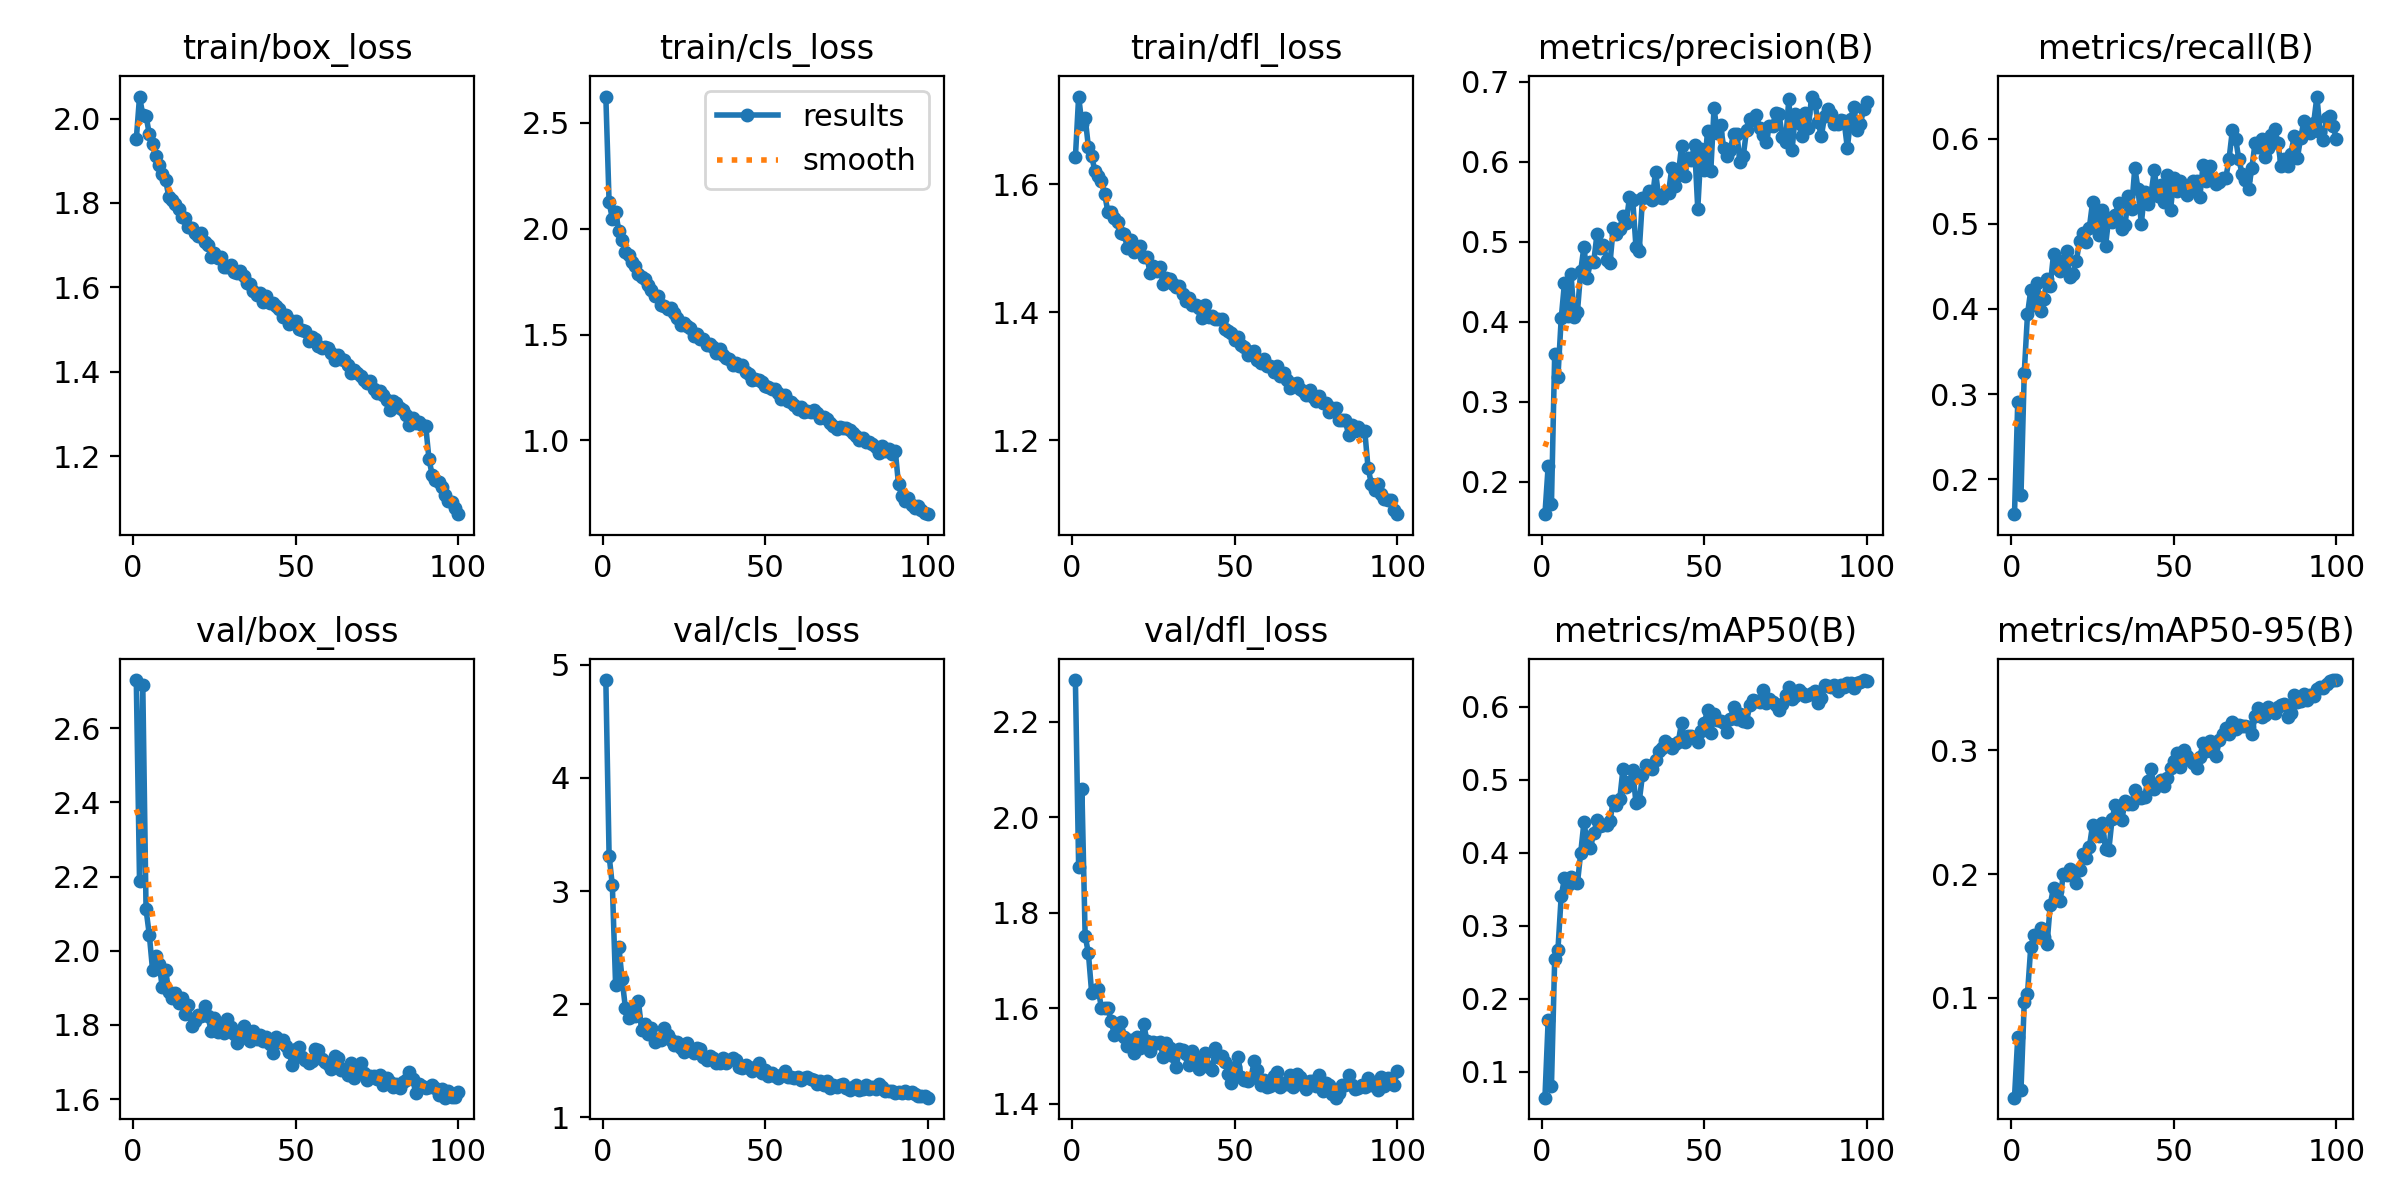

In [ ]:
#  Post-Training: Display Metrics and Logs from the GDrive mount 
RUN_OUTPUT_PATH = os.path.join(YOLO_SAVE_DIR, RUN_NAME)

# METRICS & LOSS CURVES (Image)
metrics_path = os.path.join(RUN_OUTPUT_PATH, "results.png")
if os.path.exists(metrics_path):
    print(f"\nDisplaying metrics image from: {metrics_path}")
    display(Image(filename=metrics_path))
else:
    print(f"Training metrics image not found at {metrics_path}!")

In [10]:
# YAML TRAIN CONFIG LOG
opt_path = os.path.join(RUN_OUTPUT_PATH, "opt.yaml")
if os.path.exists(opt_path):
    print("\nTraining Config:")
    !cat {opt_path}
else:
    print(f"Training config file not found at {opt_path}!")


Training config file not found at /content/YOLO_Output/runs/detect/fire-detection-exp1/opt.yaml!


In [ ]:
# BEST MODEL PATH
best_model_path = os.path.join(RUN_OUTPUT_PATH, "weights", "best.pt")
print("\nBest model saved at:", best_model_path)

# VALIDATION using BEST model
print("\nRunning validation on the best model...")
best_model = YOLO(best_model_path) # Load from the GDrive mounted path
val_results = best_model.val()




Best model saved at: /content/YOLO_Output/runs/detect/fire-detection-exp1/weights/best.pt

Running validation on the best model...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1343.1±760.1 MB/s, size: 70.9 KB)


val: Scanning /content/Final_Dataset/valid/labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.32it/s]


                   all        510       1112       0.67       0.61      0.636      0.357
Speed: 0.7ms preprocess, 7.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val


In [13]:
import pandas as pd
import os

log_path = "/content/YOLO_Output/runs/detect/fire-detection-exp1/results.csv"

if os.path.exists(log_path):
    df = pd.read_csv(log_path)
    df.columns = df.columns.str.strip()
    print("Available columns:\n", df.columns.tolist())
else:
    print("CSV not found.")


Available columns:
 ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']



Plotting metrics from CSV: /content/YOLO_Output/runs/detect/fire-detection-exp1/results.csv


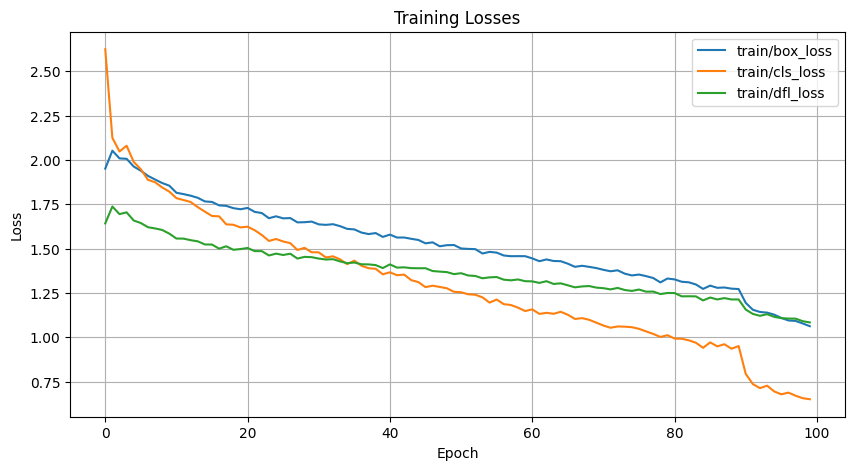

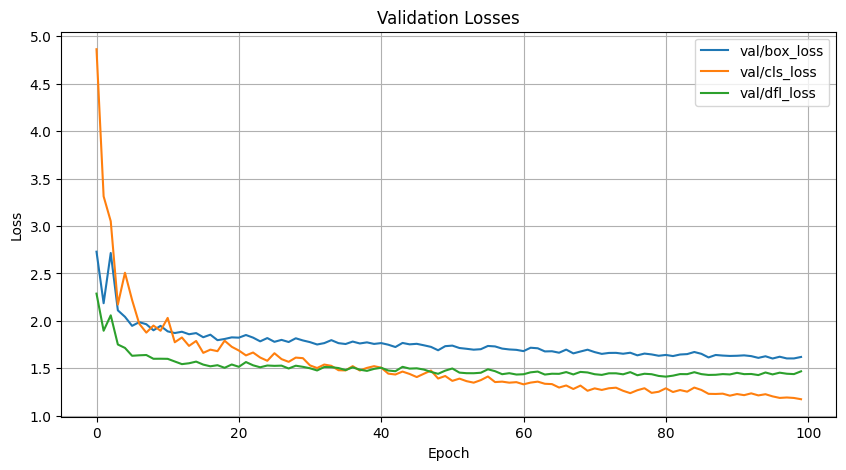

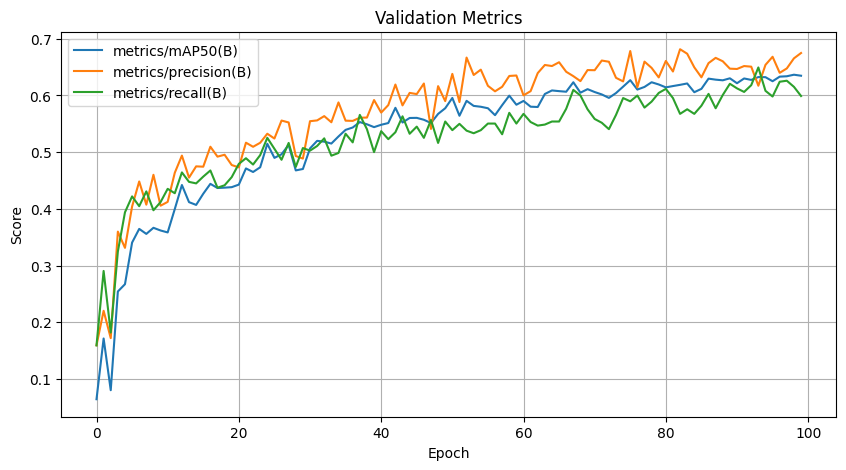

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

log_path = "/content/YOLO_Output/runs/detect/fire-detection-exp1/results.csv"

if os.path.exists(log_path):
    print(f"\nPlotting metrics from CSV: {log_path}")
    df = pd.read_csv(log_path)
    df.columns = df.columns.str.strip()  # Clean up column names

    # Plot training losses
    df[['train/box_loss', 'train/cls_loss', 'train/dfl_loss']].plot(figsize=(10, 5), title='Training Losses')
    plt.grid(True)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

    # Plot validation losses
    df[['val/box_loss', 'val/cls_loss', 'val/dfl_loss']].plot(figsize=(10, 5), title='Validation Losses')
    plt.grid(True)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

    # Plot mAP and other metrics
    df[['metrics/mAP50(B)', 'metrics/precision(B)', 'metrics/recall(B)']].plot(figsize=(10, 5), title='Validation Metrics')
    plt.grid(True)
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

else:
    print(f"CSV log not found at {log_path}!")



Running Inference on test images (adjust 'test_imgs' path)...
Processing image: /content/Final_Dataset/images/test/0cd656f34b9411f3_jpg.rf.4570877e798022ff6878764b16a4831e.jpg

image 1/1 /content/Final_Dataset/images/test/0cd656f34b9411f3_jpg.rf.4570877e798022ff6878764b16a4831e.jpg: 448x640 1 Fire, 18.4ms
Speed: 5.1ms preprocess, 18.4ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


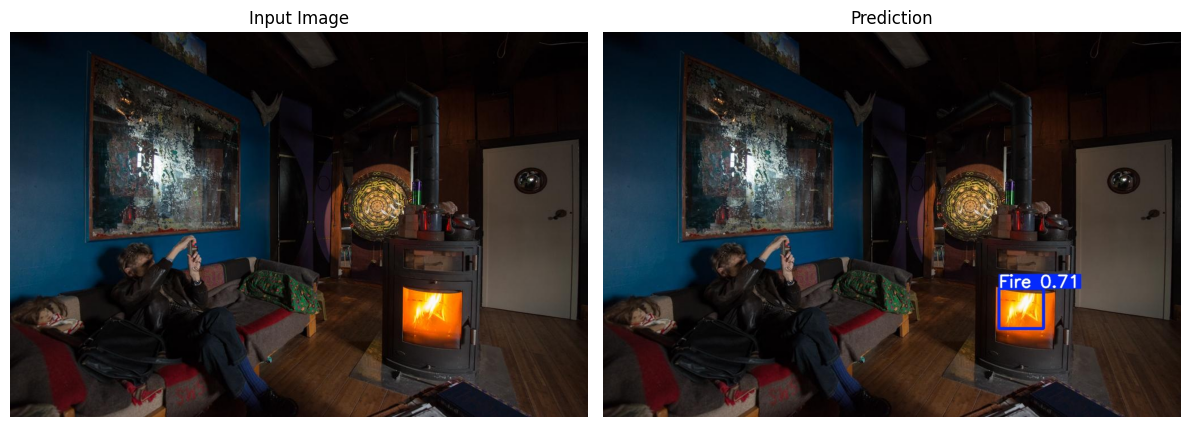

Processing image: /content/Final_Dataset/images/test/788_jpg.rf.573d2247e35cc238a5db35aa3d2addf9.jpg

image 1/1 /content/Final_Dataset/images/test/788_jpg.rf.573d2247e35cc238a5db35aa3d2addf9.jpg: 480x640 2 Fires, 14.3ms
Speed: 4.3ms preprocess, 14.3ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


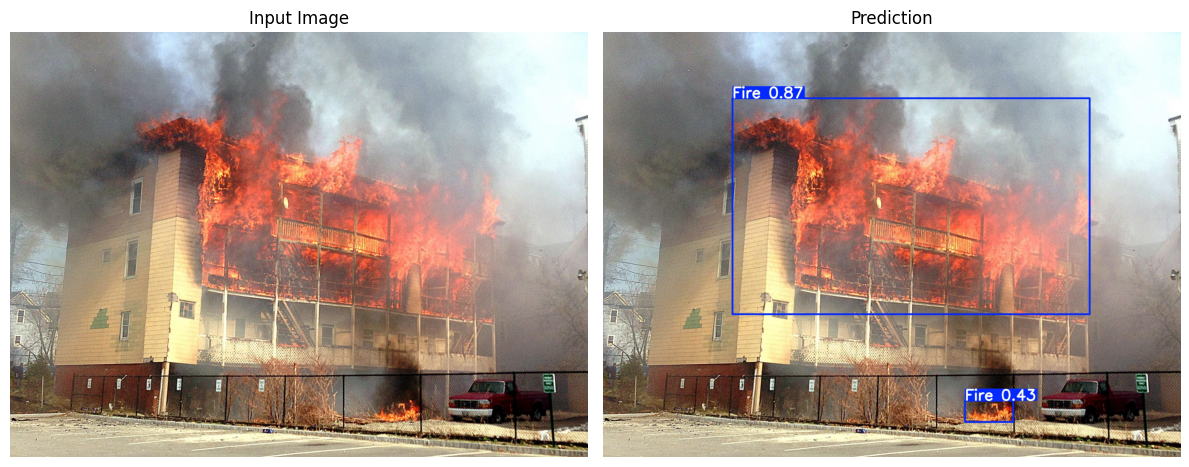

Processing image: /content/Final_Dataset/images/test/0_car-fire-m25-pic_jpg.rf.ded1a6d8d60196d9ac32543f8d4e6bc8.jpg

image 1/1 /content/Final_Dataset/images/test/0_car-fire-m25-pic_jpg.rf.ded1a6d8d60196d9ac32543f8d4e6bc8.jpg: 576x640 3 Fires, 20.3ms
Speed: 11.7ms preprocess, 20.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 640)


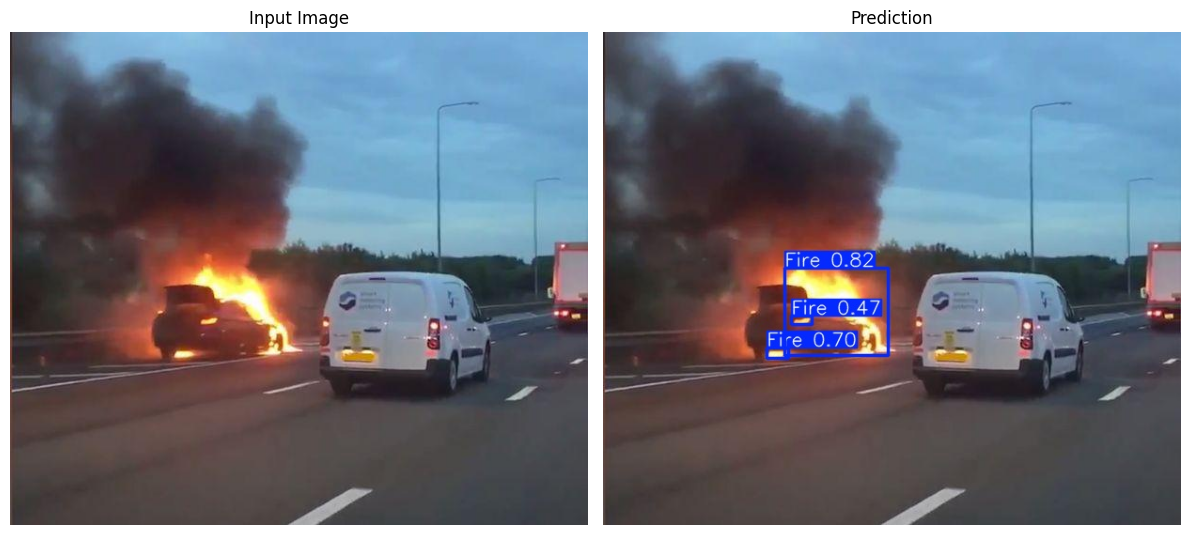

Processing image: /content/Final_Dataset/images/test/815_jpg.rf.45e60dcdaf8553dace7103f569d99250.jpg

image 1/1 /content/Final_Dataset/images/test/815_jpg.rf.45e60dcdaf8553dace7103f569d99250.jpg: 416x640 1 Fire, 13.7ms
Speed: 3.4ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


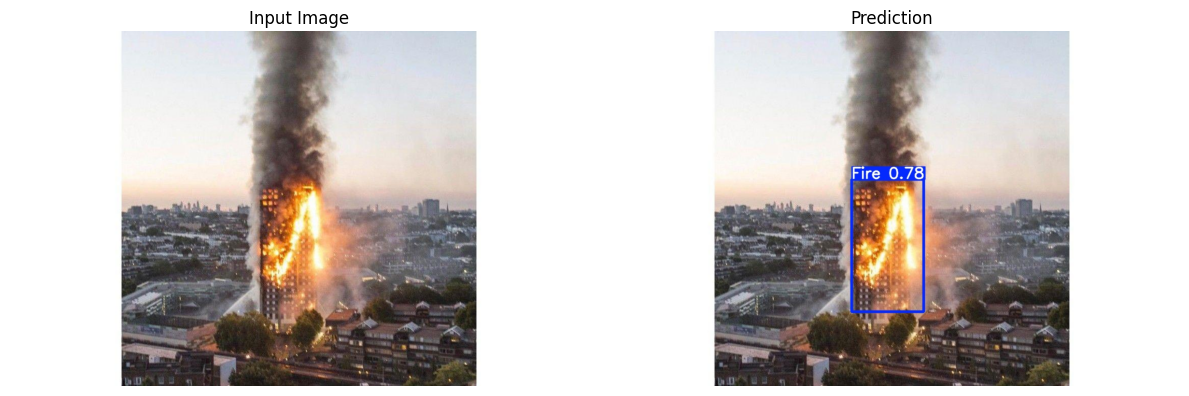

Processing image: /content/Final_Dataset/images/test/917_jpg.rf.d00f3020d379bbca9146223fd562d020.jpg

image 1/1 /content/Final_Dataset/images/test/917_jpg.rf.d00f3020d379bbca9146223fd562d020.jpg: 480x640 1 Fire, 14.4ms
Speed: 5.9ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


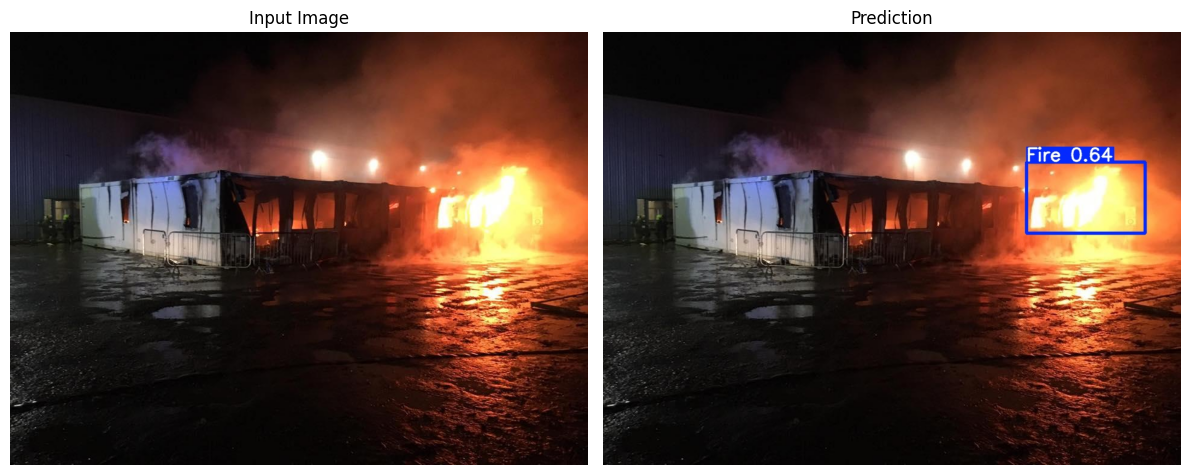

In [17]:

# INFERENCE — Side-by-side results (Adjust test_imgs path)
print("\nRunning Inference on test images (adjust 'test_imgs' path)...")
# IMPORTANT: Adjust this path to point to a test images folder within your mounted dataset
test_imgs_dir = os.path.join(PROJECT_DATA_MOUNT_PATH, "images", "test") # Example: assuming test images are in Final_Dataset/images/test
# Check if the directory exists before globbing
if os.path.exists(test_imgs_dir):
    test_imgs = glob(os.path.join(test_imgs_dir, "*.jpg"))[:5] # Take up to 5 images
    if not test_imgs:
        print(f"No .jpg images found in {test_imgs_dir}. Please check path and image types.")
    for img_path in test_imgs:
        print(f"Processing image: {img_path}")
        results = best_model(img_path)
        out_path = f"/content/pred_{os.path.basename(img_path)}" # Save predictions locally in Colab for display
        results[0].save(filename=out_path)

        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(PILImage.open(img_path))
        ax[0].set_title("Input Image")
        ax[0].axis('off')

        ax[1].imshow(PILImage.open(out_path))
        ax[1].set_title("Prediction")
        ax[1].axis('off')

        plt.tight_layout()
        plt.show()
        # Clean up local prediction file if desired
        !rm {out_path}
else:
    print(f"Test images directory not found at: {test_imgs_dir}. Please create or adjust the path.")



In [16]:
# --- SAVE BEST & LAST MODEL TO GOOGLE DRIVE ---
import shutil

# Google Drive save path (change if needed)
gdrive_output_path = "/content/drive/MyDrive/Yolo_Training_Results/fire-detection-exp1"
os.makedirs(gdrive_output_path, exist_ok=True)

# Define source model paths
best_model_src = os.path.join(RUN_OUTPUT_PATH, "weights", "best.pt")
last_model_src = os.path.join(RUN_OUTPUT_PATH, "weights", "last.pt")

# Define destination paths
best_model_dst = os.path.join(gdrive_output_path, "best.pt")
last_model_dst = os.path.join(gdrive_output_path, "last.pt")

# Copy models
print(f"\nSaving best.pt to: {best_model_dst}")
shutil.copy2(best_model_src, best_model_dst)

print(f"Saving last.pt to: {last_model_dst}")
shutil.copy2(last_model_src, last_model_dst)

print(" Both best and last model files saved to Google Drive.")



Saving best.pt to: /content/drive/MyDrive/Yolo_Training_Results/fire-detection-exp1/best.pt
Saving last.pt to: /content/drive/MyDrive/Yolo_Training_Results/fire-detection-exp1/last.pt
 Both best and last model files saved to Google Drive.


In [ ]:
#  EXPORT MODEL (Optional - for deployment)
# best_model.export(format="onnx")  # other formats: "torchscript", "engine", etc.
